<a href="https://colab.research.google.com/github/mukeshjnv/NYC-Taxi-Trip-Time-Prediction-Regression-ML-problem/blob/main/NYC_Taxi_Trip_Time_Predictionipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Objective

<h1> Task </h> 

Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables

<ul depth="0" class="list-disc my-4 w-11/12">
<li index="0" class="text-base list-inside py-1 listing w-11/12 text-justify">Efficient EDA</li>
<li index="1" class="text-base list-inside py-1 listing w-11/12 text-justify">Encoding if necessary.</li>
<li index="2" class="text-base list-inside py-1 listing w-11/12 text-justify">Feature selection, new feature creation</li>
<li index="3" class="text-base list-inside py-1 listing w-11/12 text-justify">Dealing with multicollinearity if any</li>
<li index="4" class="text-base list-inside py-1 listing w-11/12 text-justify">Feature scaling</li>
<li index="5" class="text-base list-inside py-1 listing w-11/12 text-justify">Understanding the target feature and its distribution</li>
<li index="6" class="text-base list-inside py-1 listing w-11/12 text-justify">Modeling - use at least two algorithms</li>
<li index="7" class="text-base list-inside py-1 listing w-11/12 text-justify">Evaluation and improvement of model.</li>
<li index="8" class="text-base list-inside py-1 listing w-11/12 text-justify">Feature Importance and Conclusion</li>
<li index="9" class="text-base list-inside py-1 listing w-11/12 text-justify">Understanding of how your project is useful to stakeholders?</li>
</ul>

<center> <img  src="https://ab-strapi-qa.s3.ap-south-1.amazonaws.com/Regression_NYC_Taxi_Trip_Time_Prediction_91a23744ad.png" width="700" height="500"> </center>

In [1]:
# mounting drive to colab notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# loading required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
# reading data and creatinf DataFrame
data=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Captstone project/Regression/NYC Taxi Data.csv')

#EDA

In [4]:
# get data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


This dataset contains 14,58,644 observations and 11 columns
We observe that the pickup_datetime and dropoff_datetime is in object type, There it is needed to convert to datetime data type

In [5]:
# top 5 observations
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [6]:
# bottom 5 observations
data.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


id is unique for each trip so this column has no effect on trip duration prediction, Therefore it is better to drop this column.

In [7]:
# check null values
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

The dataset contains no null values

In [8]:
# check duplicates values
data.duplicated().sum()

0

This dataset contains no duplicated values

In [9]:
# get statistics of numerical columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
vendor_id,1458644.0,1.534950,0.498777,1.000000,1.000000,2.000000,2.000000,2.000000e+00
passenger_count,1458644.0,1.664530,1.314242,0.000000,1.000000,1.000000,2.000000,9.000000e+00
pickup_longitude,1458644.0,-73.973486,0.070902,-121.933342,-73.991867,-73.981743,-73.967331,-6.133553e+01
pickup_latitude,1458644.0,40.750921,0.032881,34.359695,40.737347,40.754101,40.768360,5.188108e+01
dropoff_longitude,1458644.0,-73.973416,0.070643,-121.933304,-73.991325,-73.979752,-73.963013,-6.133553e+01
dropoff_latitude,1458644.0,40.751800,0.035891,32.181141,40.735885,40.754524,40.769810,4.392103e+01
trip_duration,1458644.0,959.492273,5237.431724,1.000000,397.000000,662.000000,1075.000000,3.526282e+06


In [10]:
# get statistics of non-numeric columns
data.describe(include='O').T

,count,unique,top,freq
id,1458644,1458644,id2875421,1
pickup_datetime,1458644,1380222,2016-03-04 08:07:34,5
dropoff_datetime,1458644,1380377,2016-02-19 19:25:04,5
store_and_fwd_flag,1458644,2,N,1450599


In [11]:
# drop id column
data.drop(['id'], axis=1, inplace=True)
data.head(3)

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124


## Data visulation

1. vendor_id

<Axes: >

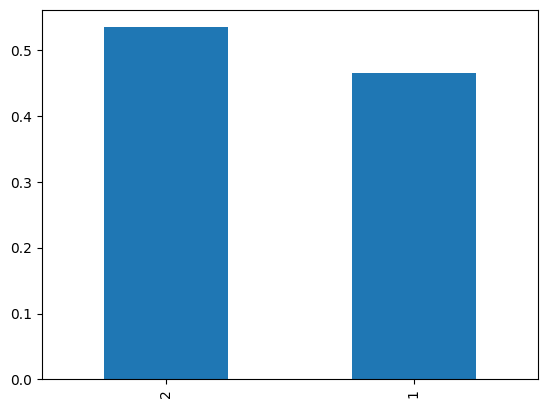

In [21]:
(data['vendor_id'].value_counts()/data.shape[0]).plot(kind='bar')

The numbers of taxi trip services provided by both service providers are almost same and equals to 50%

2. passenger_count

<Axes: >

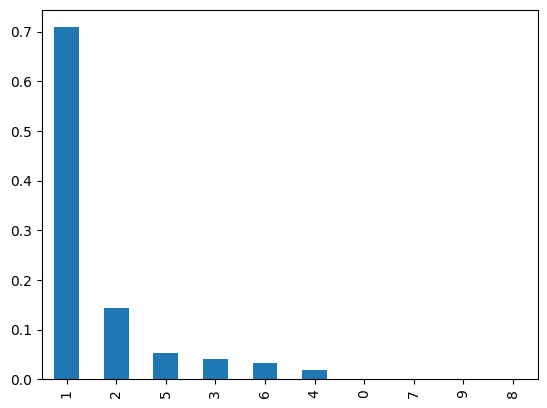

In [22]:
(data['passenger_count'].value_counts()/data.shape[0]).plot(kind='bar')

Most traxi trips carry one passengesr and they rarely carry zero passengers or moer than six.

3. store_and_fwd_flag

<Axes: >

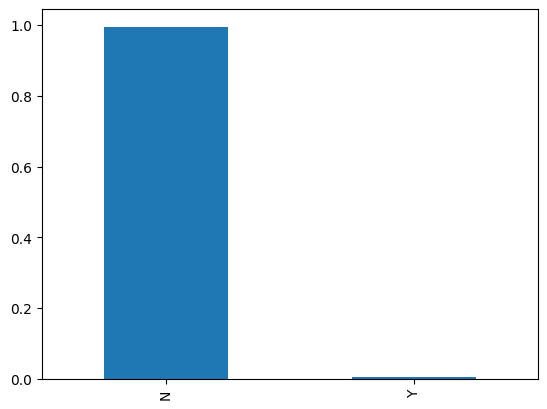

In [23]:
(data['store_and_fwd_flag'].value_counts()/data.shape[0]).plot(kind='bar')

Most of the trip records are held in vehicle memory.

As plotiing location denstity plot off all location can be comutational expensive do taking 10,000 samples and ploting it.

In [ ]:
"""import plotly.express as px

# Create a DataFrame with columns 'lat' and 'lon'
data = pd.DataFrame({
    'lat': lat[:1000000],
    'lon': lon[:1000000]
})

# Create a density map
fig = px.density_mapbox(data, lat='lat', lon='lon', radius=10, zoom=10,
                        mapbox_style="carto-positron", opacity=0.8)
# , width=10, height=10
fig.update_layout(title='Density of Pick Up Locations', width=1500, height=800)
fig.show()"""

In [24]:
lat=data.sample(n=10000, random_state=42)['dropoff_latitude'].tolist()
lon=data.sample(n=10000, random_state=42)['dropoff_longitude'].tolist()
import plotly.express as px

# Create a DataFrame with columns 'lat' and 'lon'
data_ = pd.DataFrame({
    'lat': lat,
    'lon': lon
})

# Create a density map
fig = px.density_mapbox(data_, lat='lat', lon='lon', radius=10, zoom=10,
                        mapbox_style="carto-positron", opacity=0.8)
# , width=10, height=10
fig.update_layout(title='Density of Drop Off Locations', width=1500, height=800)
fig.show()



*   daytime vs taxi service frequency  
*   List item




In [30]:
# converting time to datetime format
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])

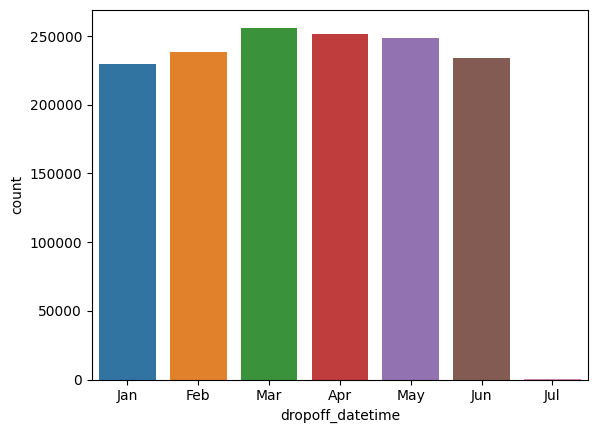

In [33]:
# taxi trip frequency across months
ax=sns.countplot(x=data['dropoff_datetime'].dt.month)
ax.set_xticks([0, 1, 2, 3, 4, 5, 6])  # set 4 tick locations
ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul"])
plt.show()

dropoff_datetime

<Axes: xlabel='dropoff_datetime', ylabel='count'>

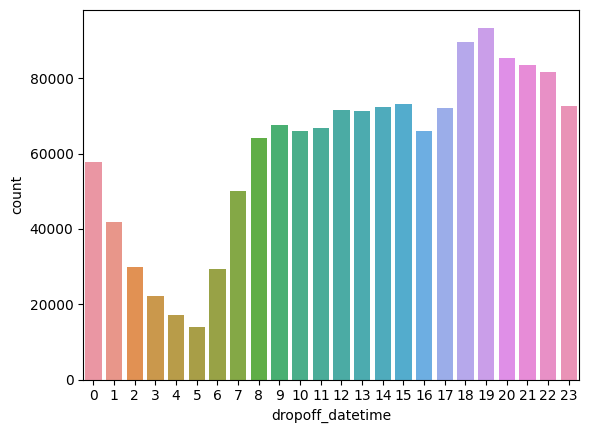

In [34]:
sns.countplot(x=data['dropoff_datetime'].dt.hour, )

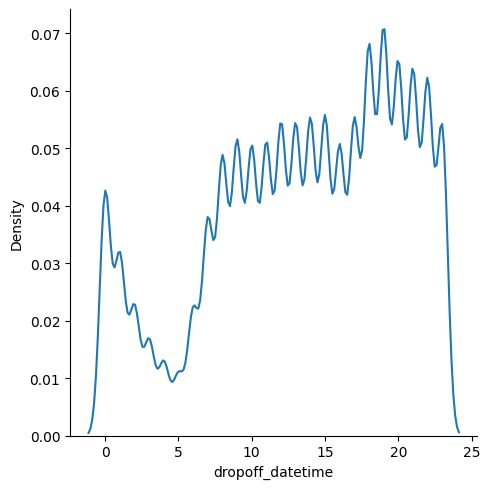

In [35]:
sns.displot(data['dropoff_datetime'].dt.hour,kind='kde')

1. mostly people travel in night 6pm to 12pm.
2. Trafic is just constant from 9am to 5pm. It may be because of office hours.

Datetime 
1. This data is for year 2016 olny.
2. It has just month from Jan to Jul

gurgaon
sec53
sec30
3rd 19thjune
Mansi

In [ ]:
IQR=df['trip_duration'].quantile(0.75)-df['trip_duration'].quantile(0.75)
UL=df['trip_duration'].quantile(0.75)+IQR*1.5
df.drop(df[df.trip_duration>UL].index, inplace=True)

# Feature Enginneering

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Captstone project/Regression/NYC Taxi Data.csv')

In [98]:
df=data.copy()

df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])
df['store_and_fwd_flag']=df['store_and_fwd_flag'].apply(lambda x: 0 if x=='N' else 1)

# creating  hour and month column
df['hour']=df['pickup_datetime'].dt.hour
df['month']=df['pickup_datetime'].dt.month

#Droping unnecessary columns
df.drop(['dropoff_datetime','pickup_datetime','id'], axis=1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
y_train_pred=reg.predict(X_train)
y_test_pred=reg.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.004518623793102083

In [ ]:
r2_score(y_train, y_train_pred)

0.0018616876013415329

<AxesSubplot:>

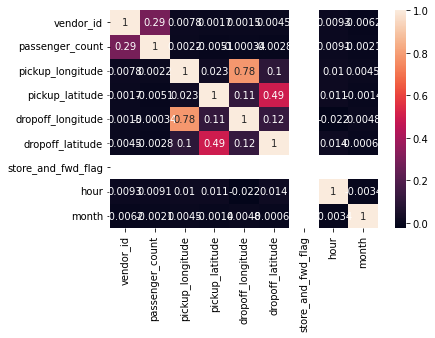

In [ ]:
corr=X.corr()
sns.heatmap(corr, annot=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

def my_train_test_split(df, scaler_='StandardScaler'):
  y=df['trip_duration']
  X=df[[c for c in df.columns.tolist() if c!='trip_duration']]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
  if scaler_=='MinMax':
    scaler = StandardScaler()
    X_train=scaler.fit_transform(X_train)
    X_test=scaler.transform(X_test)
  else:
    scaler = StandardScaler()
    X_train=scaler.fit_transform(X_train)
    X_test=scaler.transform(X_test)
  return X_train, X_test, y_train, y_test

# def performance(X_train, X_test, y_train, y_test):
#     mse_train=mean_squared_error(y_train, model.predict(X_train))
#     mse_test=mean_squared_error(y_test, model.predict(X_test))
#     r2_train=r2_score(y_train, model.predict(X_train))
#     r2_test=r2_score(y_test, model.predict(X_test))  


#     print(f"RMSE of train dataset", mse_train)
#     print(f"RMSE of test dataset", mse_test)
#     print(f"RMSE of train dataset", r2_test)
#     print(f"RMSE of test dataset", r2_train)

def model(algo):
  X_train, X_test, y_train, y_test=my_train_test_split(df)
  if algo=='Linear Regression':
    model = LinearRegression()
    model.fit(X_train, y_train)
  elif algo=='Decision Tree':
    model = DecisionTreeRegressor()
    model.fit(X_train, y_train)

  elif algo=='KNN':
    model = KNeighborsRegressor()
    model.fit(X_train, y_train)

  elif algo=='SVR':
    model = SVR()
    model.fit(X_train, y_train)

  else:
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
  

  mse_train=mean_squared_error(y_train, model.predict(X_train), squared=False)
  mse_test=mean_squared_error(y_test, model.predict(X_test), squared=False)
  r2_train=r2_score(y_train, model.predict(X_train))
  r2_test=r2_score(y_test, model.predict(X_test))  


  print(f"RMSE of train dataset", mse_train)
  print(f"RMSE of test dataset", mse_test)
  print(f"R2_score of train dataset", r2_test)
  print(f"R2_score of test dataset", r2_train)



In [ ]:
model_name=['Linear Regression', 'Decision Tree', 'KNN', 'SVM', 'Random Forest']

In [ ]:
y=df['trip_duration']
X=df[[c for c in df.columns.tolist() if c!='trip_duration']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
model.predict(X_train)

array([508.08946439, 542.04113804, 553.93951942, ..., 537.0196459 ,
       552.05368964, 536.41979955])

In [ ]:
model('Linear Regression')

In [ ]:
from datetime import datetime
datetime.now()

datetime.datetime(2023, 3, 29, 17, 15, 43, 830180)

In [ ]:
for algorithm in model_name:
  start_time=datetime.now()
  print(algorithm)
  model(algorithm)
  print(f"Time taken: {datetime.now()-start_time}3")

Linear Regression
RMSE of train dataset 256.6990553557813
RMSE of test dataset 257.1466260876857
R2_score of train dataset 0.007569386220805274
R2_score of test dataset 0.010006881777723686
Time taken: 0:00:01.9209613
Decision Tree
RMSE of train dataset 1.426462834301505
RMSE of test dataset 212.51819485955346
R2_score of train dataset 0.3221544827978198
R2_score of test dataset 0.9999694293582009
Time taken: 0:00:17.1488673
KNN
RMSE of train dataset 148.60871186699345
RMSE of test dataset 183.34247815142513
R2_score of train dataset 0.4954959162596825
R2_score of test dataset 0.6682032144829018
Time taken: 0:15:09.2645193
SVM
RMSE of train dataset 55.86632621588951
RMSE of test dataset 149.66907087031413
R2_score of train dataset 0.6637962007612421
R2_score of test dataset 0.9531096082967843
Time taken: 0:18:30.6133773
Random Forest
RMSE of train dataset 55.84797290940713
RMSE of test dataset 149.66265406436273
R2_score of train dataset 0.6638250284713476
R2_score of test dataset 0.95

# Outlier treatment

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/NYC Taxi Data.csv')

In [64]:
df=data.copy()

df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])
df['store_and_fwd_flag']=df['store_and_fwd_flag'].apply(lambda x: 0 if x=='N' else 0)

# creating  hour and month column
df['hour']=df['pickup_datetime'].dt.hour
df['month']=df['pickup_datetime'].dt.month

#Droping unnecessary columns
df.drop(['dropoff_datetime','pickup_datetime','id'], axis=1, inplace=True)

no of observations before outlier removal of trip duration 1458644
no of observations before after removal of trip duration 1251120


<Axes: >

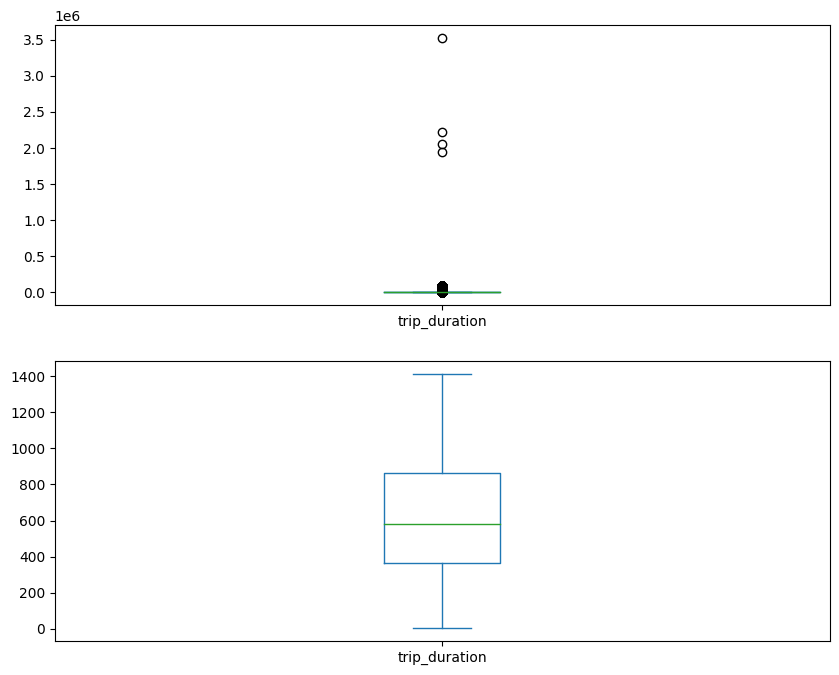

In [65]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
print(f'no of observations before outlier removal of trip duration {df.shape[0]}')
df['trip_duration'].plot(kind='box')

IQR=df['trip_duration'].quantile(0.75)-df['trip_duration'].quantile(0.25)
UL=df['trip_duration'].quantile(0.25)+IQR*1.5
df.drop(df[df.trip_duration>UL].index, inplace=True)

plt.subplot(2,1,2)
print(f'no of observations before after removal of trip duration {df.shape[0]}')
df['trip_duration'].plot(kind='box')

In [ ]:
# Box plot
numeric_columns=[c for c in df.columns if c not in ['vendor_id', 'passenger_count', 'store_and_fwd_flag']]
numeric_columns

['pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'trip_duration',
 'hour',
 'month']

In [ ]:
import numpy as np
for i, column in enumerate(numeric_columns):
  mean = np.mean(df[column])
  std = np.std(df[column])
  df[f'{column}+_cleaned'] = df[column].apply(lambda x: (x-mean)/std)
  df.drop(index=df.loc[(df[f'{column}+_cleaned']<-3) | (3<df[f'{column}+_cleaned'])].index.to_list(), inplace=True)
  df.drop(columns=[f'{column}+_cleaned'], inplace=True)

In [ ]:
df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,hour,month
0,2,1,-73.982155,40.767937,-73.964630,40.765602,0,455,17,3
1,1,1,-73.980415,40.738564,-73.999481,40.731152,0,663,0,6
3,2,1,-74.010040,40.719971,-74.012268,40.706718,0,429,19,4
4,2,1,-73.973053,40.793209,-73.972923,40.782520,0,435,13,3
5,2,6,-73.982857,40.742195,-73.992081,40.749184,0,443,22,1


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

def my_train_test_split(df, scaler_='StandardScaler'):
  y=df['trip_duration']
  X=df[[c for c in df.columns.tolist() if c!='trip_duration']]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
  if scaler_=='MinMax':
    scaler = StandardScaler()
    X_train=scaler.fit_transform(X_train)
    X_test=scaler.transform(X_test)
  else:
    scaler = StandardScaler()
    X_train=scaler.fit_transform(X_train)
    X_test=scaler.transform(X_test)
  return X_train, X_test, y_train, y_test

# def performance(X_train, X_test, y_train, y_test):
#     mse_train=mean_squared_error(y_train, model.predict(X_train))
#     mse_test=mean_squared_error(y_test, model.predict(X_test))
#     r2_train=r2_score(y_train, model.predict(X_train))
#     r2_test=r2_score(y_test, model.predict(X_test))  


#     print(f"RMSE of train dataset", mse_train)
#     print(f"RMSE of test dataset", mse_test)
#     print(f"RMSE of train dataset", r2_test)
#     print(f"RMSE of test dataset", r2_train)

def model(algo):
  X_train, X_test, y_train, y_test=my_train_test_split(df)
  if algo=='Linear Regression':
    model = LinearRegression()
    model.fit(X_train, y_train)
  elif algo=='Decision Tree':
    model = DecisionTreeRegressor()
    model.fit(X_train, y_train)

  elif algo=='KNN':
    model = KNeighborsRegressor()
    model.fit(X_train, y_train)

  elif algo=='SVR':
    model = SVR()
    model.fit(X_train, y_train)

  else:
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
  

  mse_train=mean_squared_error(y_train, model.predict(X_train), squared=False)
  mse_test=mean_squared_error(y_test, model.predict(X_test), squared=False)
  r2_train=r2_score(y_train, model.predict(X_train))
  r2_test=r2_score(y_test, model.predict(X_test))  


  print(f"RMSE of train dataset", mse_train)
  print(f"RMSE of test dataset", mse_test)
  print(f"R2_score of train dataset", r2_test)
  print(f"R2_score of test dataset", r2_train)



In [ ]:
model_name=['Linear Regression', 'Decision Tree', 'KNN', 'SVM', 'Random Forest']

In [ ]:
y=df['trip_duration']
X=df[[c for c in df.columns.tolist() if c!='trip_duration']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
model.predict(X_train)

array([641.08876046, 593.86807223, 689.64080747, ..., 672.24275456,
       615.53275702, 685.20177095])

In [ ]:
for algorithm in model_name:
  start_time=datetime.now()
  print(algorithm)
  model(algorithm)
  print(f"Time taken: {datetime.now()-start_time}3")

Linear Regression
RMSE of train dataset 364.5394216936537
RMSE of test dataset 361.64351380327554
R2_score of train dataset 0.018276271517397635
R2_score of test dataset 0.020055769284073266
Time taken: 0:00:00.0254253
Decision Tree
RMSE of train dataset 0.0
RMSE of test dataset 353.12888204355835
R2_score of train dataset 0.06396000296111459
R2_score of test dataset 1.0
Time taken: 0:00:00.1366533
KNN
RMSE of train dataset 233.2870693618242
RMSE of test dataset 280.3717419427286
R2_score of train dataset 0.40993968422493987
R2_score of test dataset 0.598677328455978
Time taken: 0:00:00.6028863
SVM
RMSE of train dataset 90.86139941392683
RMSE of test dataset 239.1184996032999
R2_score of train dataset 0.5708053680552654
R2_score of test dataset 0.9391204823847676
Time taken: 0:00:04.2666063
Random Forest
RMSE of train dataset 90.98348296139093
RMSE of test dataset 239.9895751840067
R2_score of train dataset 0.5676726792358129
R2_score of test dataset 0.9389567741281691
Time taken: 0:00

# Hyperparameter tuning

Support Vector Regressor

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Captstone project/Regression/NYC Taxi Data.csv')

In [ ]:
df=data.copy()

df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])
df['store_and_fwd_flag']=df['store_and_fwd_flag'].apply(lambda x: 0 if x=='N' else 0)

# creating  hour and month column
df['hour']=df['pickup_datetime'].dt.hour
df['month']=df['pickup_datetime'].dt.month

#Droping unnecessary columns
df.drop(['dropoff_datetime','pickup_datetime','id'], axis=1, inplace=True)

print('No of observation before outlier treatment of trip_duration', df.shape[0])
IQR=df['trip_duration'].quantile(0.75)-df['trip_duration'].quantile(0.75)
UL=df['trip_duration'].quantile(0.75)+IQR*1.5
df.drop(df[df.trip_duration>UL].index, inplace=True)

print('No of observation after outlier treatment of trip_duration', df.shape[0])
print('\n')
print('No of observation before outlier treatment of other features', df.shape[0])

numeric_columns=[c for c in df.columns if c not in ['vendor_id', 'passenger_count', 'store_and_fwd_flag']]

for i, column in enumerate(numeric_columns):
  mean = np.mean(df[column])
  std = np.std(df[column])
  df[f'{column}+_cleaned'] = df[column].apply(lambda x: (x-mean)/std)
  df.drop(index=df.loc[(df[f'{column}+_cleaned']<-3) | (3<df[f'{column}+_cleaned'])].index.to_list(), inplace=True)
  df.drop(columns=[f'{column}+_cleaned'], inplace=True)

print('No of observation after outlier treatment of other features', df.shape[0])

No of observation before outlier treatment of trip_duration 1458644
No of observation after outlier treatment of trip_duration 1094153


No of observation before outlier treatment of other features 1094153
No of observation after outlier treatment of other features 1061600


## Random Forest

In [ ]:
df.shape

(10000, 10)

In [96]:
# Default model
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
df=df.sample(10000, random_state=42)

y=df['trip_duration']

# y=np.log(y)
X=df[[c for c in df.columns.tolist() if c!='trip_duration']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

start=datetime.now()
print('.........Training.......\n')
model = RandomForestRegressor()
model.fit(X_train, y_train)

print('Training time', datetime.now()-start)

print('\n')

mse_train=mean_squared_error(y_train, model.predict(X_train), squared=False)
mse_test=mean_squared_error(y_test, model.predict(X_test), squared=False)
r2_train=r2_score(y_train, model.predict(X_train))
r2_test=r2_score(y_test, model.predict(X_test))  


print(f"RMSE of train dataset", mse_train)
print(f"RMSE of test dataset", mse_test)
print(f"R2_score of train dataset", r2_train)
print(f"R2_score of test dataset", r2_test)

.........Training.......

Training time 0:00:08.695432


RMSE of train dataset 86.35547895613142
RMSE of test dataset 228.3315529439591
R2_score of train dataset 0.9367275475832033
R2_score of test dataset 0.5606532080728706


In [ ]:
# Default model
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
# df=df.sample(10000, random_state=42)

y=df['trip_duration']

# y=np.log(y)
X=df[[c for c in df.columns.tolist() if c!='trip_duration']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

start=datetime.now()
print('.........Training.......\n')
model = RandomForestRegressor()
model.fit(X_train, y_train)

print('Training time', datetime.now()-start)

print('\n')

mse_train=mean_squared_error(y_train, model.predict(X_train), squared=False)
mse_test=mean_squared_error(y_test, model.predict(X_test), squared=False)
r2_train=r2_score(y_train, model.predict(X_train))
r2_test=r2_score(y_test, model.predict(X_test))  


print(f"RMSE of train dataset", mse_train)
print(f"RMSE of test dataset", mse_test)
print(f"R2_score of train dataset", r2_train)
print(f"R2_score of test dataset", r2_test)

.........Training.......

Training time 0:16:14.210174


RMSE of train dataset 77.56398970984651
RMSE of test dataset 206.80522593855164
R2_score of train dataset 0.9562168083754284
R2_score of test dataset 0.689699327693124


In [ ]:
# Hyperparameter tuning
n_estimators = [20,50,80]+[int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
max_features = ['auto', 'sqrt']
bootstrap = [True, False]
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
rf=RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [20, 50, 80, 100, 200,
                                                         300, 400, 500, 600,
                                                         700, 800, 900, 1000]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.

In [ ]:
df=df.sample(10000)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
df=df.sample(10000, random_state=42)
y=df['trip_duration']
# lst=['linear', 'rbf', 'poly', 'sigmoid']
y=np.log(y)
X=df[[c for c in df.columns.tolist() if c!='trip_duration']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

start=datetime.now()
print('.........Training.......\n')
model = SVR(kernel='rbf')
model.fit(X_train, y_train)

print('Training time', datetime.now()-start)

print('\n')

mse_train=mean_squared_error(y_train, model.predict(X_train), squared=False)
mse_test=mean_squared_error(y_test, model.predict(X_test), squared=False)
r2_train=r2_score(y_train, model.predict(X_train))
r2_test=r2_score(y_test, model.predict(X_test))  


print(f"RMSE of train dataset", mse_train)
print(f"RMSE of test dataset", mse_test)
print(f"R2_score of train dataset", r2_train)
print(f"R2_score of test dataset", r2_test)

.........Training.......

Training time 0:00:01.607115


RMSE of train dataset 0.45810009878307856
RMSE of test dataset 0.5014703980980871
R2_score of train dataset 0.5350674945621943
R2_score of test dataset 0.4774389348644509


In [ ]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

df=df.sample(10000, random_state=42)
y=df['trip_duration']
y=np.log(y)
X=df[[c for c in df.columns.tolist() if c!='trip_duration']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


parameters = {'C':[1,5,10,20,50,80,100,150,200,300]}
svc = svm.SVR()
clf = GridSearchCV(svc, parameters, cv=3)
clf.fit(X_train, y_train)


sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [ ]:
rf_random.best_score_

0.4989043057916292

In [ ]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=80, max_features='auto', min_samples_leaf=2,
                      n_estimators=500)

In [ ]:
r2_score(y_train, svc.predict(X_train))


0.4364516022435535

In [ ]:
r2_score(y_test, 
         svc.predict(X_test))  

0.3859899600770992

GBM

In [97]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

df=df.sample(10000, random_state=42)
y=df['trip_duration']

X=df[[c for c in df.columns.tolist() if c!='trip_duration']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


# parameters = {'C':[1,5,10,20,50,80,100,150,200,300]}
model = GradientBoostingRegressor()
# clf = GridSearchCV(svc, parameters, cv=3)
model.fit(X_train, y_train)
mse_train=mean_squared_error(y_train, model.predict(X_train), squared=False)
mse_test=mean_squared_error(y_test, model.predict(X_test), squared=False)
r2_train=r2_score(y_train, model.predict(X_train))
r2_test=r2_score(y_test, model.predict(X_test))  


print(f"RMSE of train dataset", mse_train)
print(f"RMSE of test dataset", mse_test)
print(f"R2_score of train dataset", r2_train)
print(f"R2_score of test dataset", r2_test)

RMSE of train dataset 247.64719715545127
RMSE of test dataset 264.4827381559473
R2_score of train dataset 0.4807059498702254
R2_score of test dataset 0.40796378057012816


# Outlier treatment

In [143]:
data=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Captstone project/Regression/NYC Taxi Data.csv')

In [154]:
df=data.copy()
print('No of observation before outlier treatment of trip_duration', df.shape[0])

df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])
df['store_and_fwd_flag']=df['store_and_fwd_flag'].apply(lambda x: 0 if x=='N' else 0)

# creating  hour and month column
df['hour']=df['pickup_datetime'].dt.hour
df['month']=df['pickup_datetime'].dt.month

#Droping unnecessary columns
df.drop(['dropoff_datetime','pickup_datetime','id'], axis=1, inplace=True)

No of observation before outlier treatment of trip_duration 1458644


no of observations before outlier removal of trip duration 1458644
no of observations before after removal of trip duration 1384320


<Axes: >

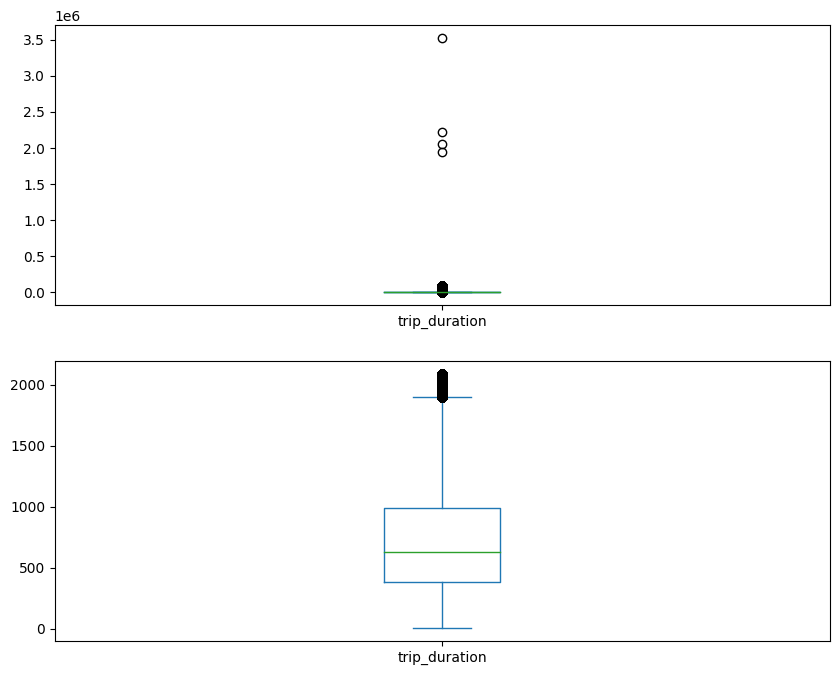

In [155]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
print(f'no of observations before outlier removal of trip duration {df.shape[0]}')
df['trip_duration'].plot(kind='box')

IQR=df['trip_duration'].quantile(0.75)-df['trip_duration'].quantile(0.25)
UL=df['trip_duration'].quantile(0.75)+IQR*1.5
LL=df['trip_duration'].quantile(0.25)-IQR*1.5
df.drop(df[(df.trip_duration>=UL)|(df.trip_duration<=LL)].index, inplace=True)

plt.subplot(2,1,2)
print(f'no of observations before after removal of trip duration {df.shape[0]}')
df['trip_duration'].plot(kind='box')

In [ ]:
IQR=df['trip_duration'].quantile(0.75)-df['trip_duration'].quantile(0.25)
UL=df['trip_duration'].quantile(0.75)+IQR*1.5
LL=df['trip_duration'].quantile(0.25)-IQR*1.5
df.drop(df[(df.trip_duration>UL) |(df.trip_duration<LL)].index, inplace=True)

In [48]:
# Box plot
numeric_columns=[c for c in df.columns if c not in ['vendor_id', 'passenger_count', 'store_and_fwd_flag']]
numeric_columns

['pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'trip_duration',
 'hour',
 'month']

before (1458644, 10)


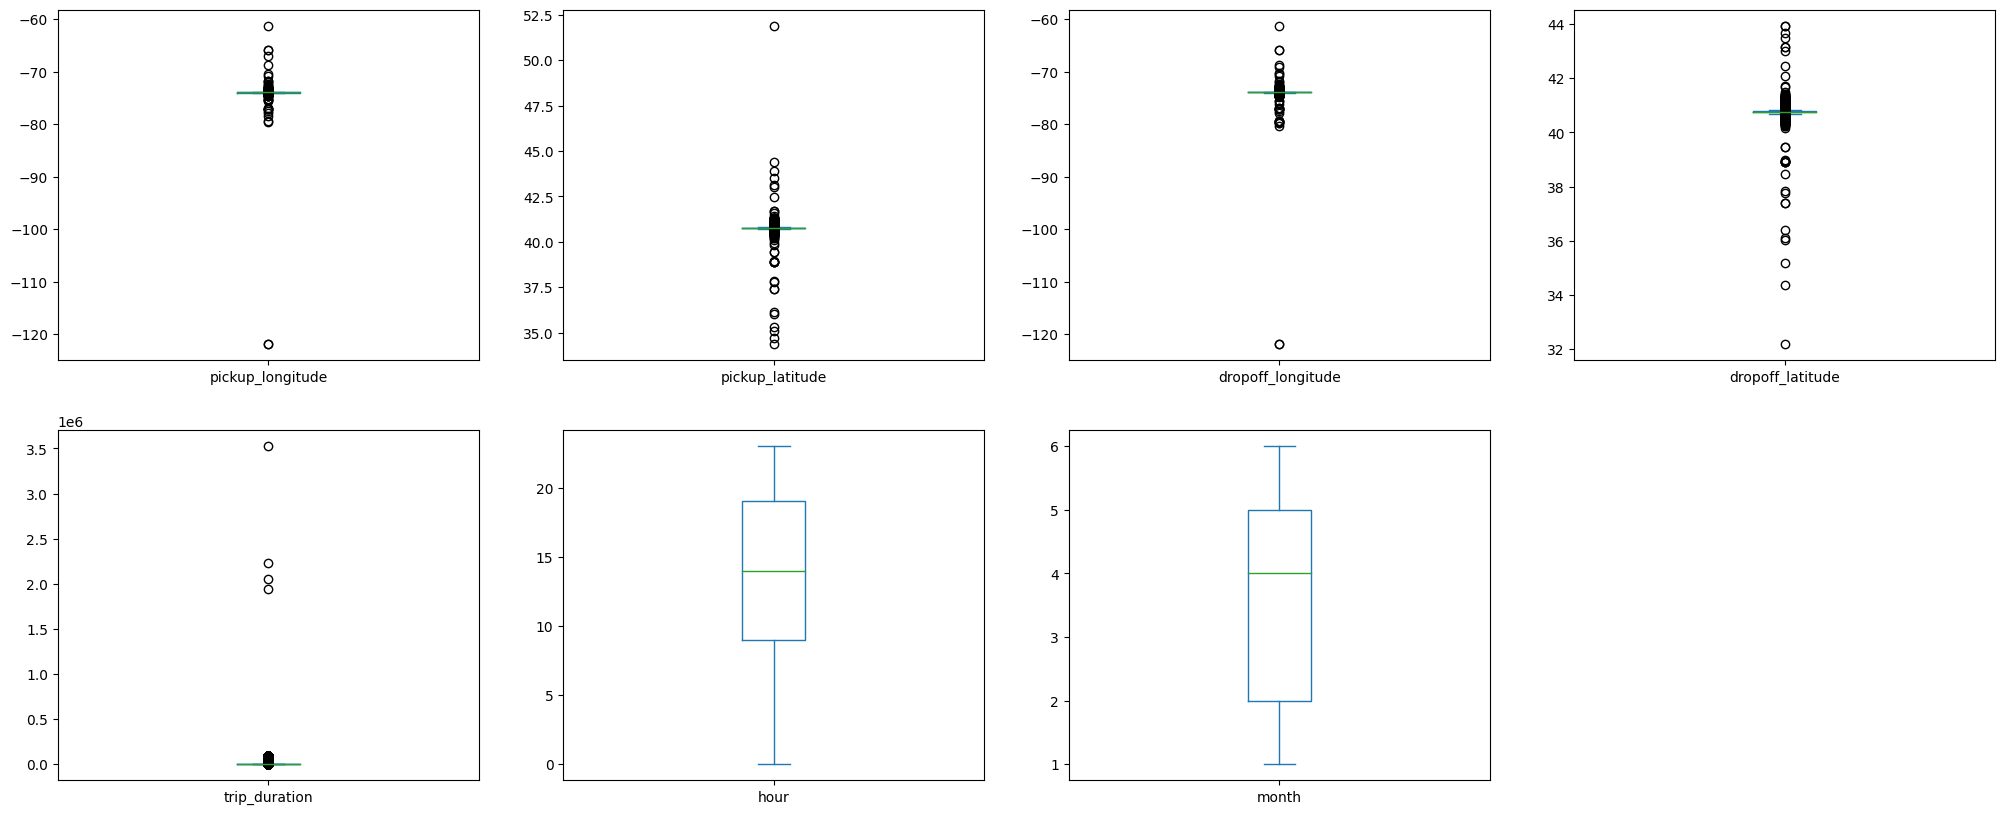

In [49]:
plt.figure(figsize=(25,10))
for i, columns in enumerate(numeric_columns):
  plt.subplot(2,4, i+1)
  df[columns].plot(kind='box')
print(f"before {df.shape}")

Box plots show that data has large amount of outliers in almost all columns except hour and month

1. SD for all columns

In [127]:
# SD on all

for i, column in enumerate(numeric_columns):
  mean = np.mean(df[column])
  std = np.std(df[column])
  df[f'{column}+_cleaned'] = df[column].apply(lambda x: (x-mean)/std)
  df.drop(index=df.loc[(df[f'{column}+_cleaned']<-2) | (2<df[f'{column}+_cleaned'])].index, inplace=True)
  df.drop(columns=[f'{column}+_cleaned'], inplace=True)
df.shape[0]

1251438

In [149]:
column='pickup_longitude'
mean = np.mean(df[column])
std = np.std(df[column])
df[f'{column}+_cleaned'] = df[column].apply(lambda x: (x-mean)/std)
df.drop(index=df.loc[(df[f'{column}+_cleaned']<-2) | (2<df[f'{column}+_cleaned'])].index, inplace=True)
df.drop(columns=[f'{column}+_cleaned'], inplace=True)

In [151]:
column='dropoff_longitude'
mean = np.mean(df[column])
std = np.std(df[column])
df[f'{column}+_cleaned'] = df[column].apply(lambda x: (x-mean)/std)
df.drop(index=df.loc[(df[f'{column}+_cleaned']<-2.5) | (2.5<df[f'{column}+_cleaned'])].index, inplace=True)
df.drop(columns=[f'{column}+_cleaned'], inplace=True)

In [153]:
column='pickup_latitude'
mean = np.mean(df[column])
std = np.std(df[column])
df[f'{column}+_cleaned'] = df[column].apply(lambda x: (x-mean)/std)
df.drop(index=df.loc[(df[f'{column}+_cleaned']<-2.5) | (2.5<df[f'{column}+_cleaned'])].index, inplace=True)
df.drop(columns=[f'{column}+_cleaned'], inplace=True)

In [133]:
column='dropoff_latitude'
mean = np.mean(df[column])
std = np.std(df[column])
df[f'{column}+_cleaned'] = df[column].apply(lambda x: (x-mean)/std)
df.drop(index=df.loc[(df[f'{column}+_cleaned']<-2.5) | (2.5<df[f'{column}+_cleaned'])].index, inplace=True)
df.drop(columns=[f'{column}+_cleaned'], inplace=True)

In [134]:
column='trip_duration'
mean = np.mean(df[column])
std = np.std(df[column])
df[f'{column}+_cleaned'] = df[column].apply(lambda x: (x-mean)/std)
df.drop(index=df.loc[(df[f'{column}+_cleaned']<-2.5) | (2.5<df[f'{column}+_cleaned'])].index, inplace=True)
df.drop(columns=[f'{column}+_cleaned'], inplace=True)

In [141]:
column='pickup_longitude'
mean = np.mean(df[column])
std = np.std(df[column])
df[f'{column}+_cleaned'] = df[column].apply(lambda x: (x-mean)/std)
df.drop(index=df.loc[(df[f'{column}+_cleaned']<-2.5) | (2.5<df[f'{column}+_cleaned'])].index, inplace=True)
df.drop(columns=[f'{column}+_cleaned'], inplace=True)

In [139]:
column='dropoff_longitude'
mean = np.mean(df[column])
std = np.std(df[column])
df[f'{column}+_cleaned'] = df[column].apply(lambda x: (x-mean)/std)
df.drop(index=df.loc[(df[f'{column}+_cleaned']<-2.5) | (2.5<df[f'{column}+_cleaned'])].index, inplace=True)
df.drop(columns=[f'{column}+_cleaned'], inplace=True)

before (1302554, 10)


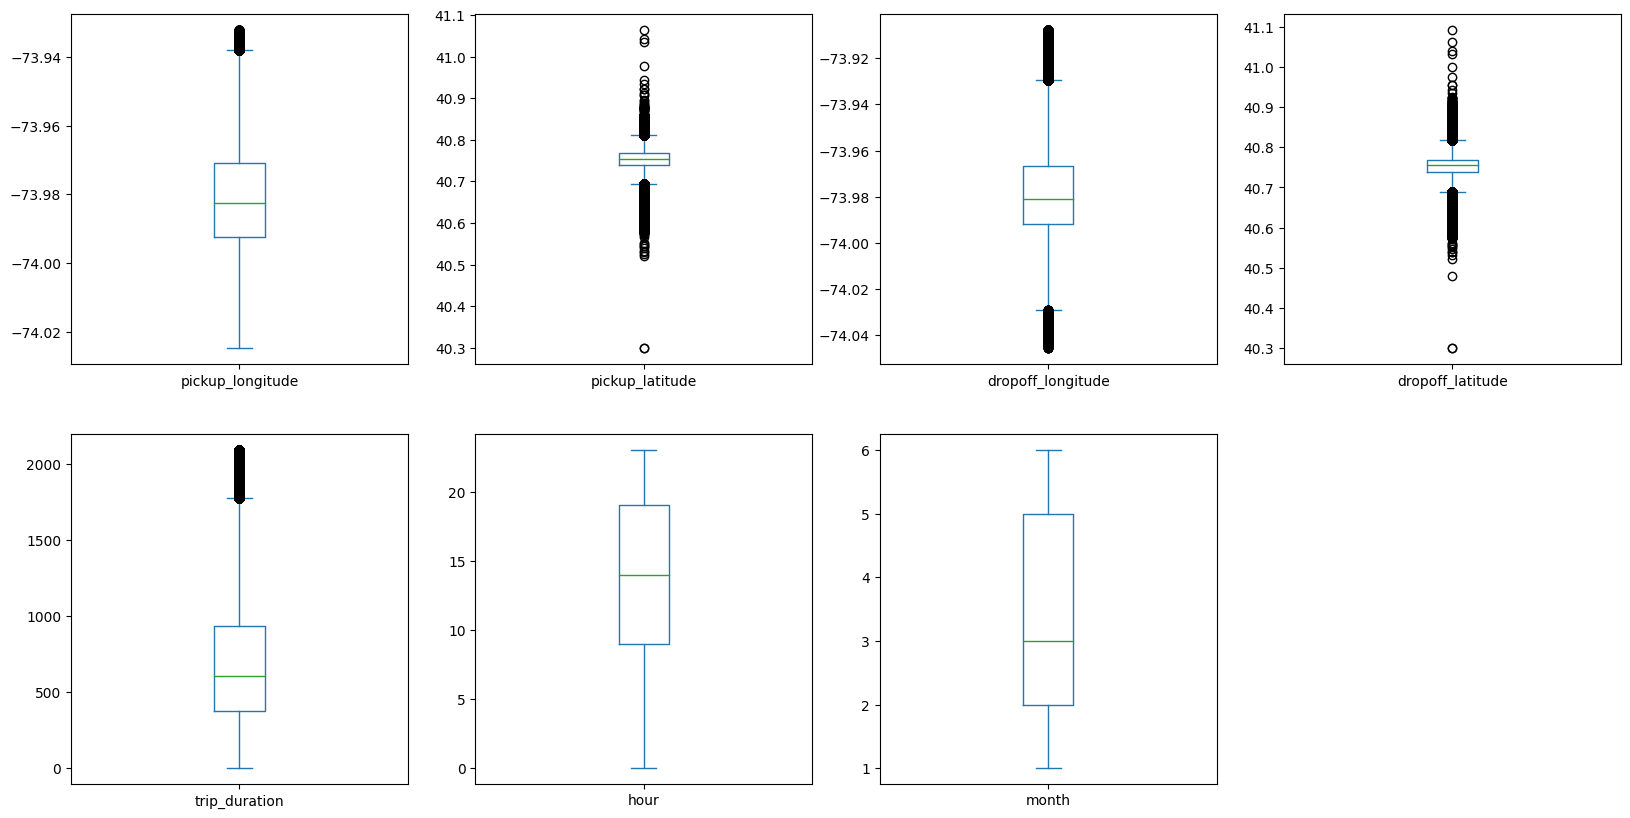

In [152]:
plt.figure(figsize=(20,10))
for i, columns in enumerate(numeric_columns):
  plt.subplot(2,4, i+1)
  df[columns].plot(kind='box')
print(f"before {df.shape}")

Still data has so much outliers in pickup_longitude and trip_duration

before (1161088, 10)


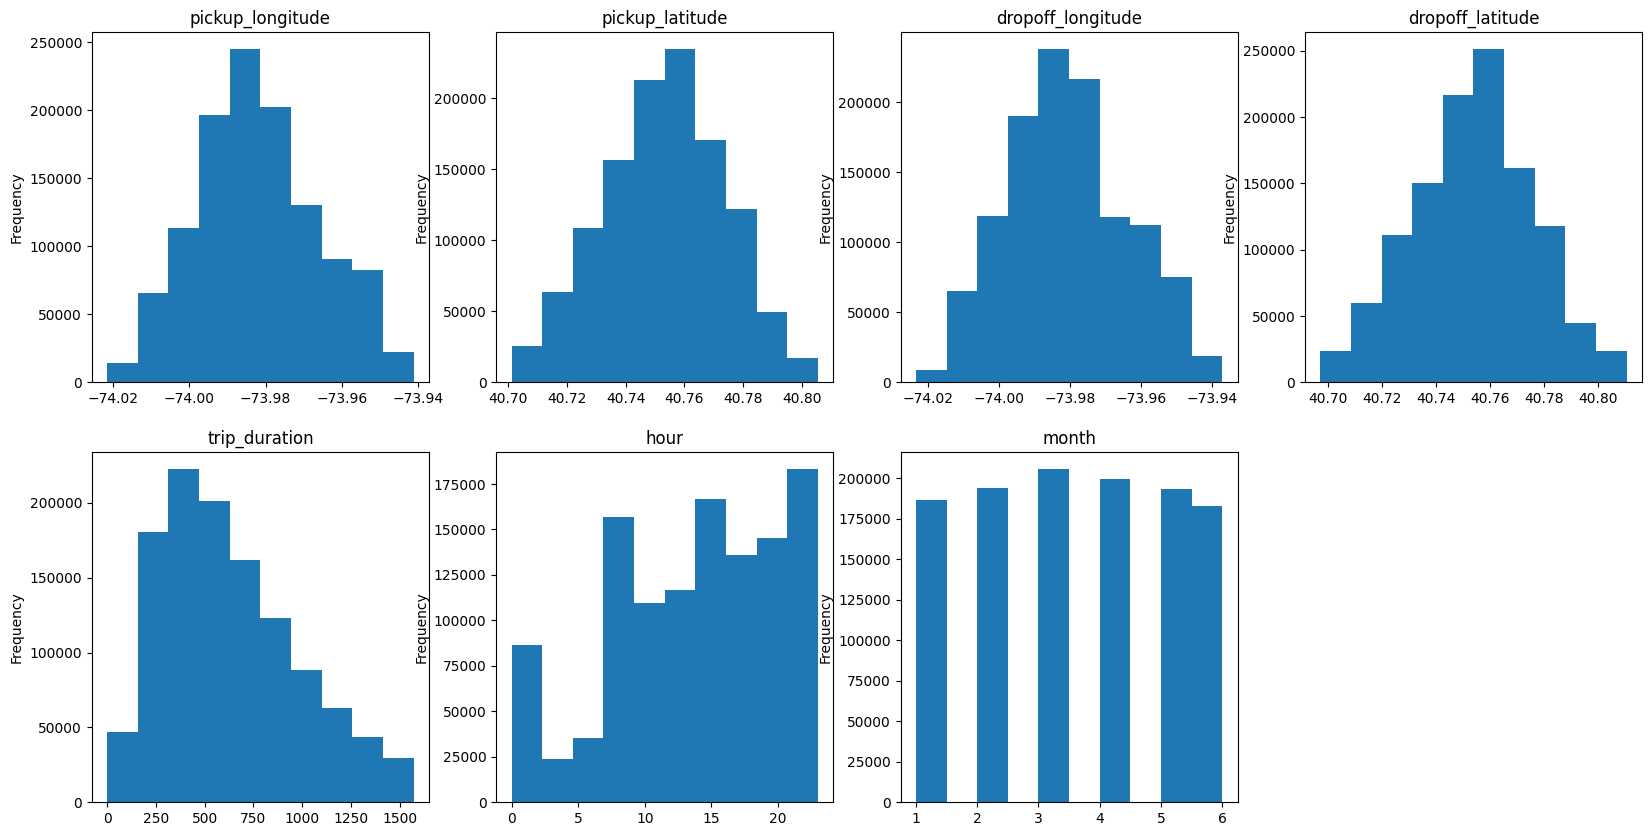

In [95]:
plt.figure(figsize=(20,10))
for i, columns in enumerate(numeric_columns):
  plt.subplot(2,4, i+1)
  df[columns].plot(kind='hist')
  plt.title(columns)
print(f"before {df.shape}")

In [80]:
#IQR for all columns
df=data.copy()
print('No of observation before outlier treatment of trip_duration', df.shape[0])

df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])
df['store_and_fwd_flag']=df['store_and_fwd_flag'].apply(lambda x: 0 if x=='N' else 0)

# creating  hour and month column
df['hour']=df['pickup_datetime'].dt.hour
df['month']=df['pickup_datetime'].dt.month

#Droping unnecessary columns
df.drop(['dropoff_datetime','pickup_datetime','id'], axis=1, inplace=True)

# IQR=df['trip_duration'].quantile(0.75)-df['trip_duration'].quantile(0.25)
# UL=df['trip_duration'].quantile(0.75)+IQR*1.5
# LL=df['trip_duration'].quantile(0.25)-IQR*1.5
# df.drop(df[(df.trip_duration>UL) | (df.trip_duration<LL)].index, inplace=True)
# #  

for i, column in enumerate(numeric_columns):
  IQR=df[column].quantile(0.75)-df[column].quantile(0.25)
  UL=df[column].quantile(0.75)+IQR*1.5
  LL=df[column].quantile(0.25)-IQR*1.5
  df.drop(df[(df[column]>UL) | (df[column]<LL)].index, inplace=True)

print('No of observation after outlier treatment of trip_duration', df.shape[0])

No of observation before outlier treatment of trip_duration 1458644
No of observation after outlier treatment of trip_duration 1212875


In [79]:
numeric_columns

['pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'trip_duration',
 'hour',
 'month']

before (1384424, 10)


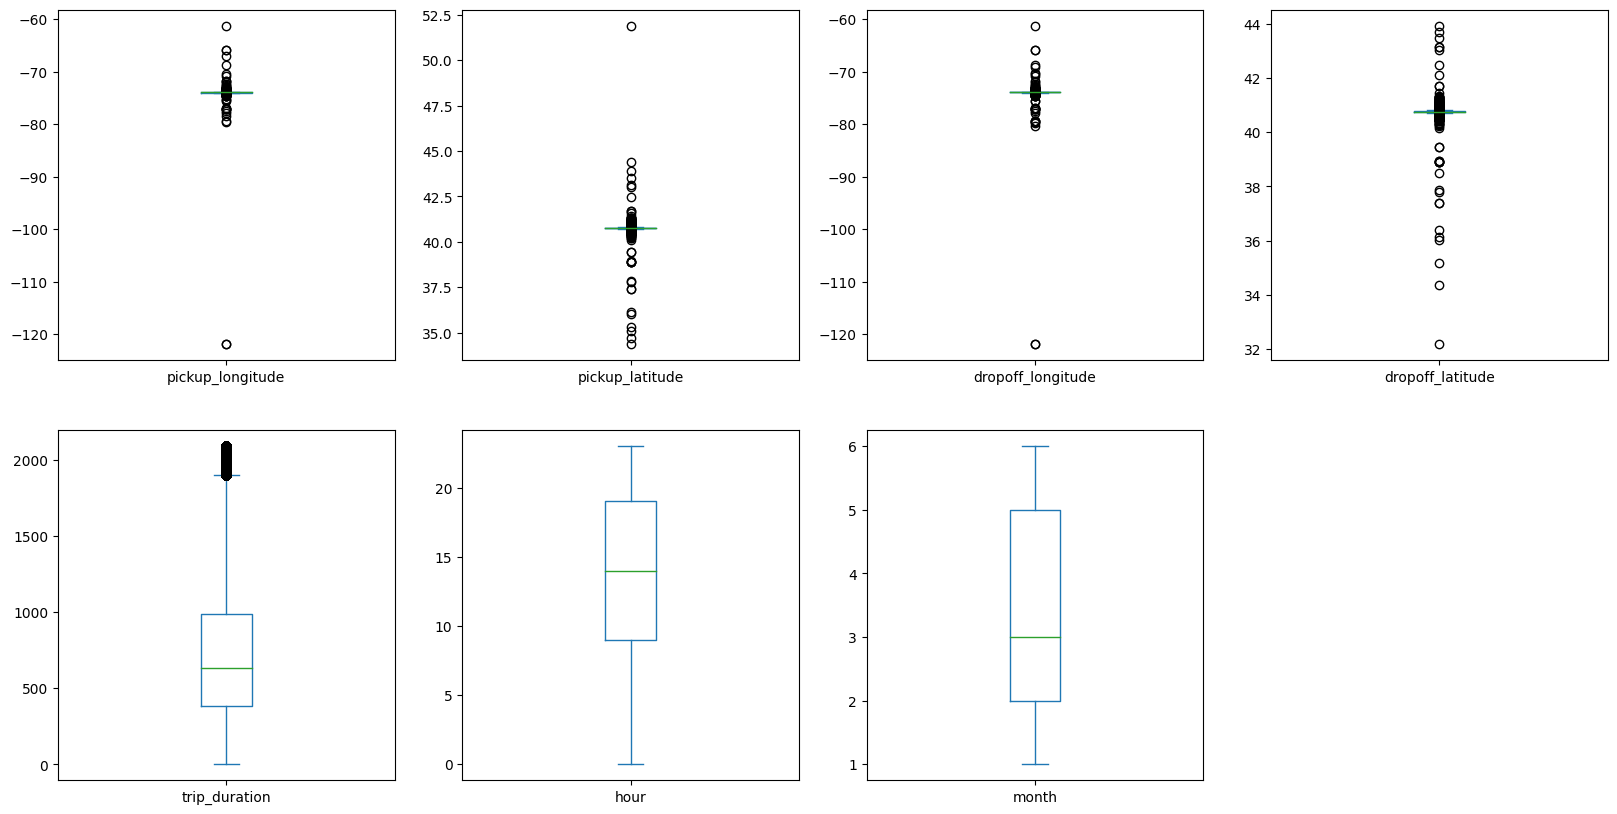

In [61]:
plt.figure(figsize=(20,10))
for i, columns in enumerate(numeric_columns):
  plt.subplot(2,4, i+1)
  df[columns].plot(kind='box')
print(f"before {df.shape}")

before (1212875, 10)


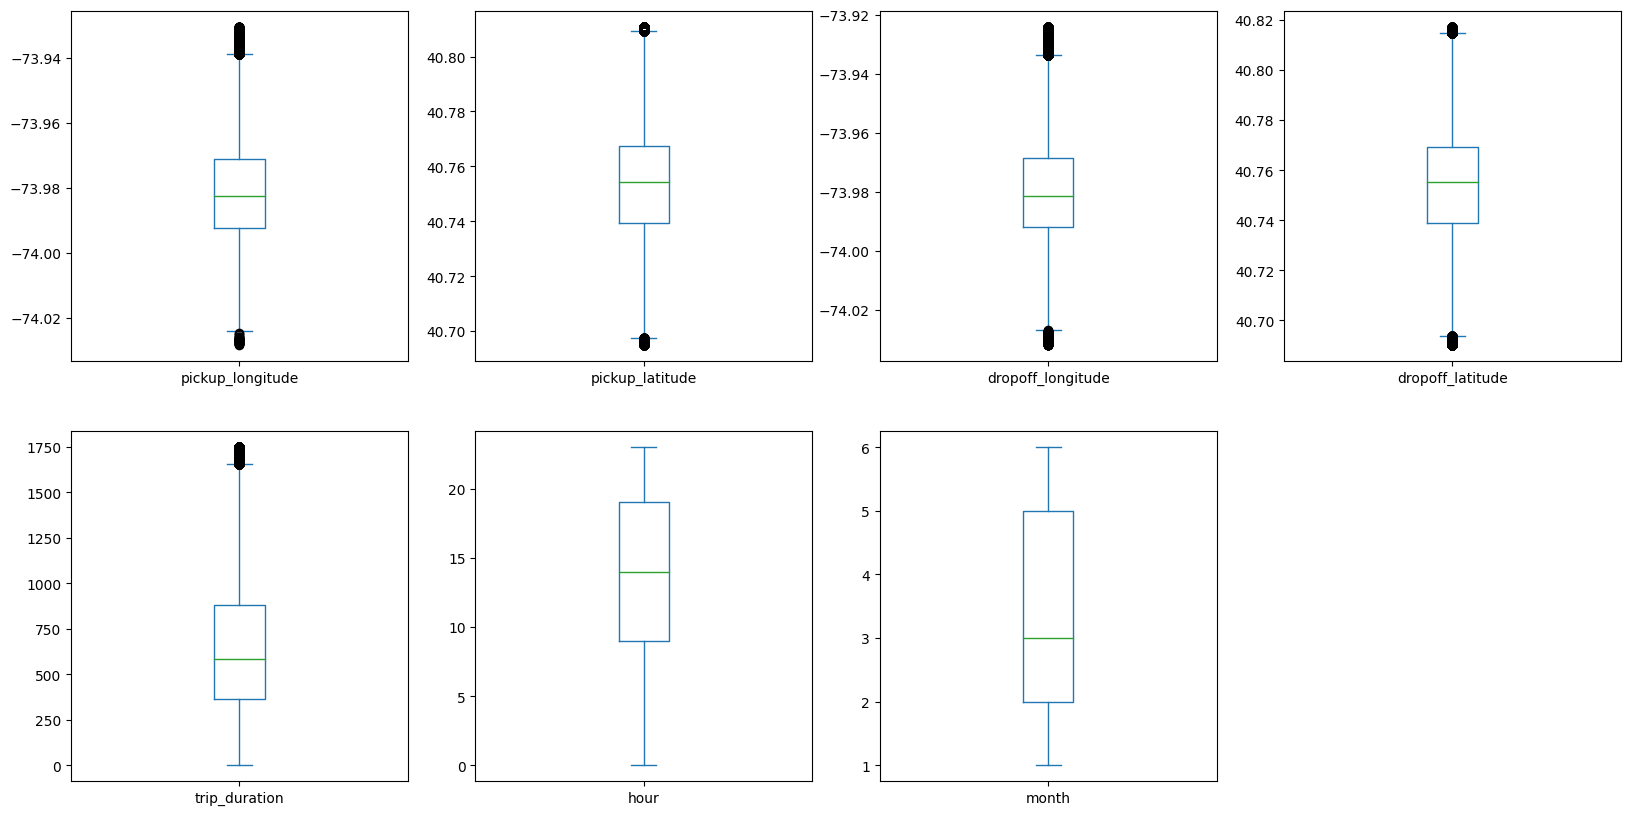

In [ ]:
plt.figure(figsize=(20,10))
for i, columns in enumerate(numeric_columns):
  plt.subplot(2,4, i+1)
  df[columns].plot(kind='box')
print(f"before {df.shape}")

In [ ]:
for i, column in enumerate(['trip_duration']):
  mean = np.mean(df[column])
  std = np.std(df[column])
  df[f'{column}+_cleaned'] = df[column].apply(lambda x: (x-mean)/std)
  df.drop(index=df.loc[(df[f'{column}+_cleaned']<-2.5) | (2.5<df[f'{column}+_cleaned'])].index, inplace=True)
  df.drop(columns=[f'{column}+_cleaned'], inplace=True)
df.shape[0]

1333293

In [ ]:
for i, column in enumerate(['pickup_longitude']):
  mean = np.mean(df[column])
  std = np.std(df[column])
  df[f'{column}+_cleaned'] = df[column].apply(lambda x: (x-mean)/std)
  df.drop(index=df.loc[(df[f'{column}+_cleaned']<-2.5) | (2.5<df[f'{column}+_cleaned'])].index, inplace=True)
  df.drop(columns=[f'{column}+_cleaned'], inplace=True)
df.shape[0]

1304302

In [ ]:
for i, column in enumerate(['dropoff_latitude']):
  mean = np.mean(df[column])
  std = np.std(df[column])
  df[f'{column}+_cleaned'] = df[column].apply(lambda x: (x-mean)/std)
  df.drop(index=df.loc[(df[f'{column}+_cleaned']<-2) | (2<df[f'{column}+_cleaned'])].index, inplace=True)
  df.drop(columns=[f'{column}+_cleaned'], inplace=True)
df.shape[0]

1210416

In [ ]:
for i, column in enumerate(['dropoff_longitude']):
  mean = np.mean(df[column])
  std = np.std(df[column])
  df[f'{column}+_cleaned'] = df[column].apply(lambda x: (x-mean)/std)
  df.drop(index=df.loc[(df[f'{column}+_cleaned']<-2.5) | (2.5<df[f'{column}+_cleaned'])].index, inplace=True)
  df.drop(columns=[f'{column}+_cleaned'], inplace=True)
df.shape[0]

1223198

In [ ]:
for i, column in enumerate(['trip_duration']):
  mean = np.mean(df[column])
  std = np.std(df[column])
  df[f'{column}+_cleaned'] = df[column].apply(lambda x: (x-mean)/std)
  df.drop(index=df.loc[(3<df[f'{column}+_cleaned'])].index, inplace=True)
  df.drop(columns=[f'{column}+_cleaned'], inplace=True)
df.shape[0]

1213768

In [ ]:
# SD on all
numeric_columns=['pickup_latitude', 'dropoff_latitude']
for i, column in enumerate(numeric_columns):
  mean = np.mean(df[column])
  std = np.std(df[column])
  df[f'{column}+_cleaned'] = df[column].apply(lambda x: (x-mean)/std)
  df.drop(index=df.loc[(df[f'{column}+_cleaned']<-2.5) | (2.5<df[f'{column}+_cleaned'])].index, inplace=True)
  df.drop(columns=[f'{column}+_cleaned'], inplace=True)
df.shape[0]

951660

In [ ]:
# SD on all
numeric_columns=['dropoff_longitude']
for i, column in enumerate(numeric_columns):
  mean = np.mean(df[column])
  std = np.std(df[column])
  df[f'{column}+_cleaned'] = df[column].apply(lambda x: (x-mean)/std)
  df.drop(index=df.loc[(df[f'{column}+_cleaned']<-2) | (2<df[f'{column}+_cleaned'])].index, inplace=True)
  df.drop(columns=[f'{column}+_cleaned'], inplace=True)
df.shape[0]

978818

before (951660, 10)


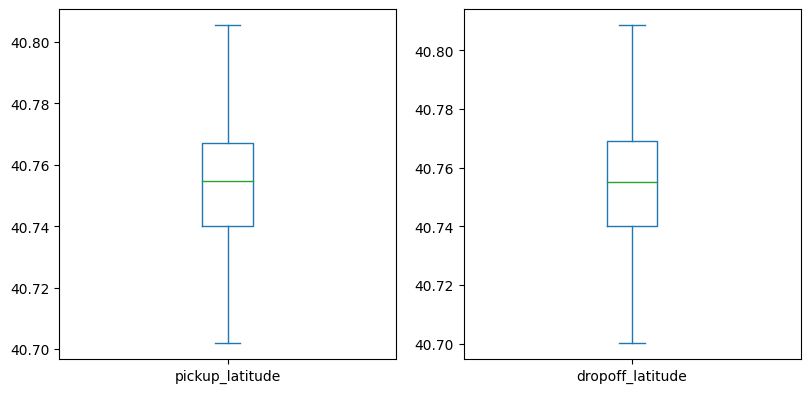

In [ ]:
plt.figure(figsize=(20,10))
for i, columns in enumerate(numeric_columns):
  plt.subplot(2,4, i+1)
  df[columns].plot(kind='box')
print(f"before {df.shape}")

No of observation before outlier treatment of trip_duration 1458644
No of observation after outlier treatment of trip_duration 1212875


In [ ]:
df=data.copy()

df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])
df['store_and_fwd_flag']=df['store_and_fwd_flag'].apply(lambda x: 0 if x=='N' else 0)

# creating  hour and month column
df['hour']=df['pickup_datetime'].dt.hour
df['month']=df['pickup_datetime'].dt.month

#Droping unnecessary columns
df.drop(['dropoff_datetime','pickup_datetime','id'], axis=1, inplace=True)

print('No of observation before outlier treatment of trip_duration', df.shape[0])
IQR=df['pickup_longitude'].quantile(0.75)-df['pickup_longitude'].quantile(0.75)
UL=df['pickup_longitude'].quantile(0.75)+IQR*1.5
LL=df['pickup_longitude'].quantile(0.25)-IQR*1.5
df.drop(df[(df.pickup_longitude>UL)| (df.pickup_longitude<LL)].index, inplace=True)
#  

print('No of observation after outlier treatment of trip_duration', df.shape[0])
print('\n')
print('No of observation before outlier treatment of other features', df.shape[0])

numeric_columns=[c for c in df.columns if c not in ['vendor_id', 'passenger_count', 'store_and_fwd_flag']]

for i, column in enumerate(numeric_columns):
  mean = np.mean(df[column])
  std = np.std(df[column])
  df[f'{column}+_cleaned'] = df[column].apply(lambda x: (x-mean)/std)
  df.drop(index=df.loc[(df[f'{column}+_cleaned']<-3) | (3<df[f'{column}+_cleaned'])].index, inplace=True)
  df.drop(columns=[f'{column}+_cleaned'], inplace=True)

print('No of observation after outlier treatment of other features', df.shape[0])

No of observation before outlier treatment of trip_duration 1458644
No of observation after outlier treatment of trip_duration 730214


No of observation before outlier treatment of other features 730214
No of observation after outlier treatment of other features 706769


In [ ]:
for i, column in enumerate(numeric_columns):
  IQR=df[column].quantile(0.75)-df[column].quantile(0.75)
  UL=df[column].quantile(0.75)+IQR*1.5
  LL=df[column].quantile(0.25)-IQR*1.5
  df.drop(df[(df[column]>UL) | (df[column]<LL)].index, inplace=True)

print('No of observation after outlier treatment of trip_duration', df.shape[0])

No of observation after outlier treatment of trip_duration 16623


In [ ]:
#IQR for all columns except output columns
df=data.copy()
print('No of observation before outlier treatment of trip_duration', df.shape[0])

df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])
df['store_and_fwd_flag']=df['store_and_fwd_flag'].apply(lambda x: 0 if x=='N' else 0)

# creating  hour and month column
df['hour']=df['pickup_datetime'].dt.hour
df['month']=df['pickup_datetime'].dt.month

#Droping unnecessary columns
df.drop(['dropoff_datetime','pickup_datetime','id'], axis=1, inplace=True)

for i, column in enumerate(numeric_columns):
  IQR=df[column].quantile(0.75)-df[column].quantile(0.75)
  UL=df[column].quantile(0.75)+IQR*1.5
  LL=df[column].quantile(0.25)-IQR*1.5
  df.drop(df[(df[column]>UL) | (df[column]<LL)].index, inplace=True)

print('No of observation after outlier treatment of trip_duration', df.shape[0])



No of observation before outlier treatment of trip_duration 1458644
No of observation after outlier treatment of trip_duration 17825


In [ ]:
# Box plot
numeric_columns=[c for c in df.columns if c not in ['vendor_id', 'passenger_count', 'store_and_fwd_flag']]
numeric_columns

['pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'trip_duration',
 'hour',
 'month']

In [ ]:
import numpy as np
for i, column in enumerate(numeric_columns):
  mean = np.mean(df[column])
  std = np.std(df[column])
  df[f'{column}+_cleaned'] = df[column].apply(lambda x: (x-mean)/std)
  df.drop(index=df.loc[(df[f'{column}+_cleaned']<-3) | (3<df[f'{column}+_cleaned'])].index.to_list(), inplace=True)
  df.drop(columns=[f'{column}+_cleaned'], inplace=True)

In [ ]:
#first trip duration
# SD on all
df=data.copy()
numeric_columns=['pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'hour',
 'month']

df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])
df['store_and_fwd_flag']=df['store_and_fwd_flag'].apply(lambda x: 0 if x=='N' else 0)

# creating  hour and month column
df['hour']=df['pickup_datetime'].dt.hour
df['month']=df['pickup_datetime'].dt.month

#Droping unnecessary columns
df.drop(['dropoff_datetime','pickup_datetime','id'], axis=1, inplace=True)


IQR=df['trip_duration'].quantile(0.75)-df['trip_duration'].quantile(0.75)
UL=df['trip_duration'].quantile(0.75)+IQR*1.5
LL=df['trip_duration'].quantile(0.25)-IQR*1.5
df.drop(df[(df.trip_duration>UL) | (df.trip_duration<LL)].index, inplace=True)

for i, column in enumerate(numeric_columns):
  mean = np.mean(df[column])
  std = np.std(df[column])
  df[f'{column}+_cleaned'] = df[column].apply(lambda x: (x-mean)/std)
  df.drop(index=df.loc[(df[f'{column}+_cleaned']<-3) | (3<df[f'{column}+_cleaned'])].index, inplace=True)
  df.drop(columns=[f'{column}+_cleaned'], inplace=True)
df.shape[0]

706769

In [ ]:
df=data.copy()
numeric_columns=['pickup_longitude','trip_duration']

df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])
df['store_and_fwd_flag']=df['store_and_fwd_flag'].apply(lambda x: 0 if x=='N' else 0)

# creating  hour and month column
df['hour']=df['pickup_datetime'].dt.hour
df['month']=df['pickup_datetime'].dt.month

#Droping unnecessary columns
df.drop(['dropoff_datetime','pickup_datetime','id'], axis=1, inplace=True)


for i, column in enumerate(numeric_columns):
  IQR=df[column].quantile(0.75)-df[column].quantile(0.75)
  UL=df[column].quantile(0.75)+IQR*1.5
  LL=df[column].quantile(0.25)-IQR*1.5
  df.drop(df[(df[column]>UL) | (df[column]<LL)].index, inplace=True)
df.shape[0]


365129

In [ ]:
df=data.copy()